# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже выбрали тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится.

    Задача от заказчика: Постройте модель с максимально большим значением *accuracy*.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-и-изучите-файл" data-toc-modified-id="Откройте-и-изучите-файл-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте и изучите файл</a></span></li><li><span><a href="#Разбивка-данные-на-выборки" data-toc-modified-id="Разбивка-данные-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбивка данные на выборки</a></span></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Подытог" data-toc-modified-id="Подытог-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Проверка-других-моделей" data-toc-modified-id="Проверка-других-моделей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка других моделей</a></span></li><li><span><a href="#Проверка-других-моделей-на-выборке-без-данных-о-потраченных-минутах" data-toc-modified-id="Проверка-других-моделей-на-выборке-без-данных-о-потраченных-минутах-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка других моделей на выборке без данных о потраченных минутах</a></span></li></ul></li><li><span><a href="#(бонус)-Проверьте-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверьте-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>(бонус) Проверьте модели на адекватность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Откройте и изучите файл

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier #для проверки адекватности модели

In [2]:
try:
    df = pd.read_csv('C://datasets/users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')
    
display(df.info())
df.head(10).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

,0,1,2,3,4,5,6,7,8,9
calls,40.00,85.00,77.00,106.00,66.00,58.00,57.00,15.0,7.00,90.00
minutes,311.90,516.75,467.66,745.53,418.74,344.56,431.64,132.4,43.39,665.41
messages,83.00,56.00,86.00,81.00,1.00,21.00,20.00,6.0,3.00,38.00
mb_used,19915.42,22696.96,21060.45,8437.39,14502.75,15823.37,3738.90,21911.6,2538.67,17358.61
is_ultra,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.0,1.00,0.00


In [3]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [4]:
df.duplicated().sum()

0

    Посмотрим распределение переменных

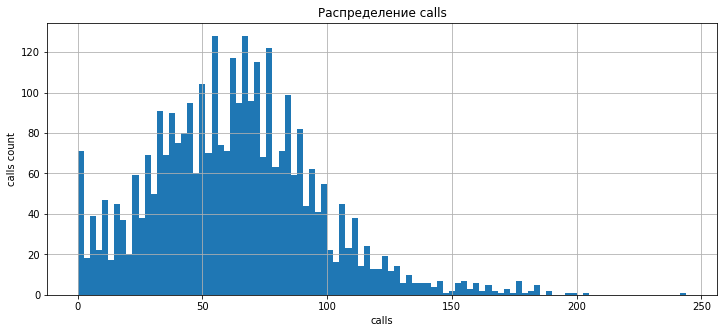

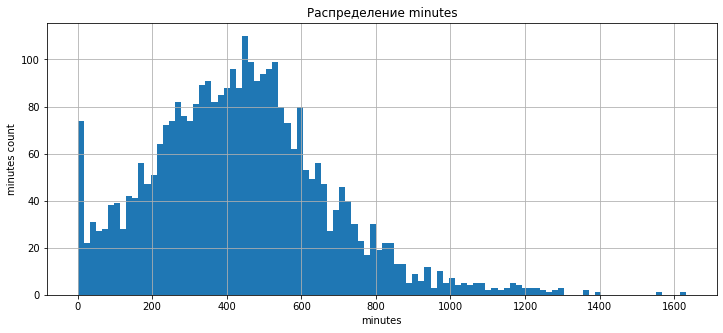

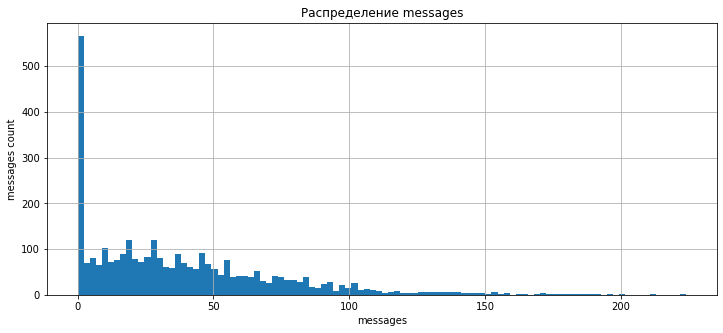

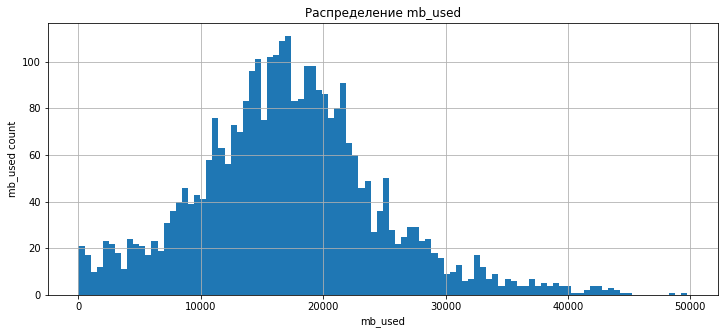

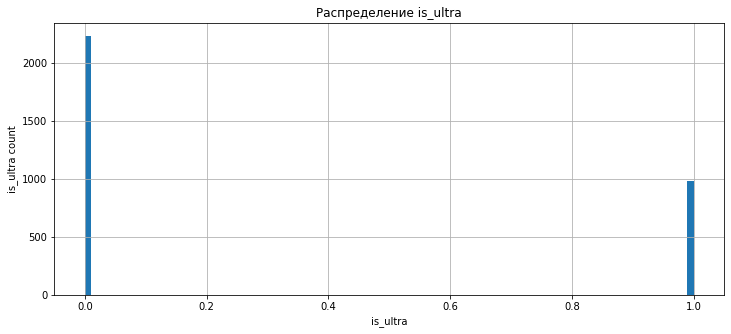

In [5]:
for x, data in df.items():
    ax = data.hist(bins = 100, figsize = (12,5))
    ax.set_xlabel(x)
    ax.set_ylabel(f'{x} count')
    ax.set_title(f'Распределение {x}', fontsize = 12)
    plt.show()
    


- 30% на тарифе ультра.
- В медиане - 430 минут, 30 СМС и 17Гб

In [6]:
%%capture
fig1 = sb.jointplot(x='minutes', y='messages', data = df)
fig2 = sb.jointplot(x='mb_used', y='messages', data = df)
fig3 = sb.jointplot(x='mb_used', y='minutes', data = df)

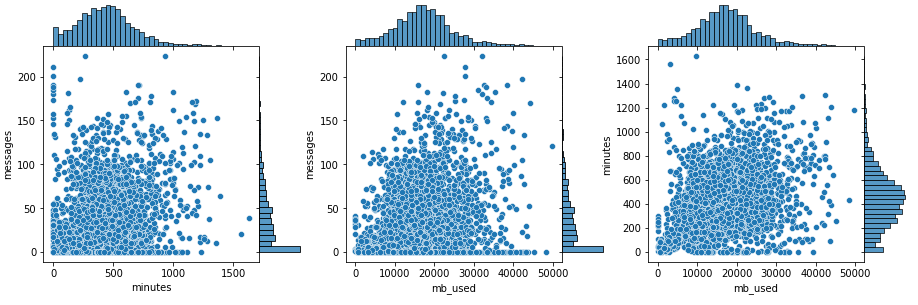

In [7]:
sb.set()
f = plt.figure()
for J in [fig1, fig2, fig3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)
#subplots size adjustment
f.axes[0].set_position([0.1, 0.1, 0.5,  0.5])
f.axes[1].set_position([0.1, 0.6, 0.5,  0.1])
f.axes[2].set_position([0.6, 0.1, 0.1, 0.5])
f.axes[3].set_position([0.8, 0.1, 0.5,  0.5])
f.axes[4].set_position([0.8, 0.6, 0.5,  0.1])
f.axes[5].set_position([1.3, 0.1, 0.1, 0.5])
f.axes[6].set_position([1.5, 0.1, 0.5,  0.5])
f.axes[7].set_position([1.5, 0.6, 0.5,  0.1])
f.axes[8].set_position([2, 0.1, 0.1, 0.5])


- Можно обратить внимание, что распределение по минутам и по использованным мегабайтам очень похожи.

In [ ]:
df['minutes'].corr(df['mb_used'])

## Разбивка данные на выборки

 - Разделим исходные данные на обучающую, валидационную и тестовую выборки.

In [8]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

features_train, features_subset, target_train, target_subset = train_test_split(
    features, target, test_size=0.40, stratify = target, random_state=111)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_subset, target_subset, test_size=0.5, stratify = target_subset, random_state=111)

display(target_train.mean())

display(target_valid.mean())

display(target_test.mean())

0.3065352697095436

0.30637636080870917

0.30637636080870917

- Сделаем дополниетльную загрузку и разбивку данных, в которых исключим столбец 'minutes'. В будущем попробуем улучшить нашу лучшую модель просто исключив его.

In [9]:
try:
    df2 = pd.read_csv('C://datasets/users_behavior.csv')
except:
    df2 = pd.read_csv('/datasets/users_behavior.csv')

In [10]:
features2 = df2.drop(['is_ultra', 'minutes'], axis=1)
target2 = df2['is_ultra']

features_train2, features_subset2, target_train2, target_subset2 = train_test_split(
    features2, target2, test_size=0.40, random_state=111, stratify = target2)

features_valid2, features_test2, target_valid2, target_test2 = train_test_split(
    features_subset2, target_subset2, test_size=0.5, random_state=111, stratify = target_subset2)

display(target_train2.mean())

display(target_valid2.mean())

display(target_test2.mean())

0.3065352697095436

0.30637636080870917

0.30637636080870917

## Тестирование моделей

Accuracy лучшей модели решающего дерева на валидационной выборке: 0.781 Глубина: 7


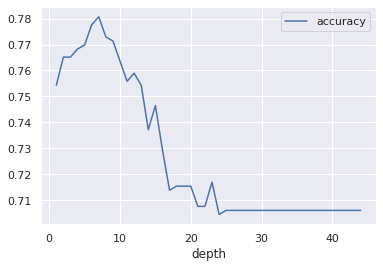

In [11]:
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0
graph = pd.DataFrame(columns=['depth', 'accuracy'])

for depth in range(1, 45):
    
    model = DecisionTreeClassifier(random_state=111, max_depth=depth) #раз уж взяли 111, то оставим везде, чтоб не путаться
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    graph = graph.append({'depth': depth, 'accuracy': result}, ignore_index=True)
    if result > best_result_tree:
        best_model_tree = model
        best_result_tree = result
        best_depth_tree = depth
        
print("Accuracy лучшей модели решающего дерева на валидационной выборке:", round(best_result_tree, 3), "Глубина:", best_depth_tree)
graph.plot(x = 'depth', y = 'accuracy')
plt.show()

- Очевидное переобучение после глубины в 7 развилок.

Accuracy наилучшей модели случайного леса на валидационной выборке: 0.785 Количество деревьев: 26


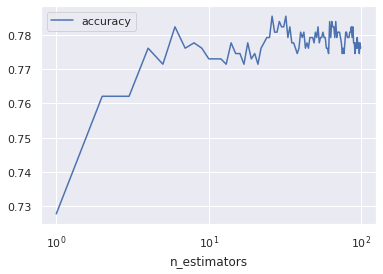

In [12]:
best_model_random_forest = None
best_result_random_forest = 0
best_est_random_forest = 0
graph = pd.DataFrame(columns=['n_estimators', 'accuracy'])

for est in range(1, 100):
    model = RandomForestClassifier(random_state=111, n_estimators= est)
    model.fit(features_train, target_train) 
    result = model.score(features_valid, target_valid)
    graph = graph.append({'n_estimators': est, 'accuracy': result}, ignore_index=True)
    if result > best_result_random_forest:
        best_model_random_forest = model 
        best_result_random_forest = result
        best_est_random_forest = est

print("Accuracy наилучшей модели случайного леса на валидационной выборке:", round(best_result_random_forest, 3), 
      "Количество деревьев:", best_est_random_forest)
graph.plot(x = 'n_estimators', y = 'accuracy', logx=True)
plt.show()

In [13]:
result = best_model_random_forest.score(features_test, target_test) 
print("А на тестовой выборке результат:", round(result, 3))
print("Модель:", best_model_random_forest)

А на тестовой выборке результат: 0.801
Модель: RandomForestClassifier(n_estimators=26, random_state=111)


In [14]:
model_logic_regress = LogisticRegression(random_state=111, solver='lbfgs', max_iter=1000)
model_logic_regress.fit(features_train, target_train)

print("Accuracy модели логистической регрессии на валидационной выборке:", round(model_logic_regress.score(features_valid, target_valid), 3))
print("Модель:", model_logic_regress)

Accuracy модели логистической регрессии на валидационной выборке: 0.731
Модель: LogisticRegression(max_iter=1000, random_state=111)


In [15]:
best_model_random_forest_new = None
best_result_random_forest_new = 0
best_est_random_forest_new = 0
best_depth_new = 0
best_min_samples_split = 0
for est in range(1, 30):
    for depth in range(1, 20):
        for split in range(2,11):
            model = RandomForestClassifier(random_state=111, n_estimators= est, max_depth=depth, min_samples_split = split )
            model.fit(features_train, target_train) 
            result = model.score(features_valid, target_valid)
            if result > best_result_random_forest_new:
                best_model_random_forest_new = model 
                best_result_random_forest_new = result
                best_est_random_forest_new = est
                best_depth_new = depth
                best_min_samples_split = split
print(" Accuracy наилучшей модели случайного леса на валидационной выборке:", round(best_result_random_forest_new, 3), 
      "Количество деревьев:", best_est_random_forest_new,'\n',
      "Глубина:", best_depth_new,'\n',
      best_model_random_forest_new,'\n'
     )

 Accuracy наилучшей модели случайного леса на валидационной выборке: 0.801 Количество деревьев: 6 
 Глубина: 17 
 RandomForestClassifier(max_depth=17, min_samples_split=5, n_estimators=6,
                       random_state=111) 



- Исключим данные по количеству использованных минут.

In [16]:
best_model_tree2 = None
best_result_tree2 = 0
best_depth_tree2 = 0
for depth in range(1, 45):
    
    model = DecisionTreeClassifier(random_state=111, max_depth=depth) #раз уж взяли 111, то оставим везде, чтоб не путаться
    model.fit(features_train2, target_train2) 
    predictions2 = model.predict(features_valid2)
    result = accuracy_score(target_valid2, predictions2)
    if result > best_result_tree2:
        best_model_tree2 = model
        best_result_tree2 = result
        best_depth_tree2 = depth
        
print("Accuracy лучшей модели решающего дерева на валидационной выборке без 'minutes':", round(best_result_tree2, 3), 
      "Глубина:", best_depth_tree2)

Accuracy лучшей модели решающего дерева на валидационной выборке без 'minutes': 0.782 Глубина: 7


In [17]:
best_model_random_forest_new2 = None
best_result_random_forest_new2 = 0
best_est_random_forest_new2 = 0
best_depth_new2 = 0
best_min_samples_split2 = 0
for est in range(1, 20):
    for depth in range(1, 20):
        for split in range(2,11):
            model = RandomForestClassifier(random_state=111, n_estimators= est, max_depth=depth, min_samples_split = split )
            model.fit(features_train2, target_train2) 
            result = model.score(features_valid2, target_valid2)
            if result > best_result_random_forest_new2:
                best_model_random_forest_new2 = model 
                best_result_random_forest_new2 = result
                best_est_random_forest_new2 = est
                best_depth_new2 = depth
                best_min_samples_split2 = split
            
print("Accuracy наилучшей модели случайного леса на валидационной выборке без 'minutes':", round(best_result_random_forest_new2, 3),'\n', 
      "Количество деревьев:", best_est_random_forest_new2,'\n',
      "Глубина:", best_depth_new2,'\n',
      best_model_random_forest_new2
     )

Accuracy наилучшей модели случайного леса на валидационной выборке без 'minutes': 0.806 
 Количество деревьев: 6 
 Глубина: 9 
 RandomForestClassifier(max_depth=9, min_samples_split=9, n_estimators=6,
                       random_state=111)


### Подытог

Подведем итоги по точности на валидационной выборке наших моделей:
    
1) Решающее дерево: 0.780715

2) Случайный лес: 0.785381 
    
3) Логистической регрессии: 0.730948
    
4) Случайный леса с подбором гиперпараметров: 0.800933
    
Так же мы протестировали как изменится точность двух моделей, если из данных удалить столбец "minutes":
    
5) Решающее дерево без 'minutes' : 0.782270 (выше на 0.0015)
    
6) Случайный леса с подбором гиперпараметров без 'minutes': 0.805600 (выше на 0.0046)    

    
Кажется, что настраивать модель с выбросом данных на данном этапе для повышения точности на 0,0046 не кажется правильным. 


## Проверка модели на тестовой выборке


На данный момент, лучшим выбором выглядит случайный лес с подобранными гиперпараметрами. 
    
По результатам валидации мы уже выбрали модель:
    
    RandomForestClassifier(max_depth=17, min_samples_split=5, n_estimators=6, random_state=111)
    
    
<b>Её точность на валидационной выборке : <b>0.801</b>    

In [18]:
print("Accuracy наилучшей модели случайного леса с тремя меняемыми гиперпараметрами на тестовой выборке:", 
      round(best_model_random_forest_new.score(features_test, target_test), 3))
print("Модель:", 
      best_model_random_forest_new)

Accuracy наилучшей модели случайного леса с тремя меняемыми гиперпараметрами на тестовой выборке: 0.792
Модель: RandomForestClassifier(max_depth=17, min_samples_split=5, n_estimators=6,
                       random_state=111)


<b>Точность на тестовой выборке : <b>0.792</b>    

### Проверка других моделей

In [19]:
print("Accuracy лучшей модели решающего дерева на тестовой выборке:", round(best_model_tree.score(features_test, target_test),3))

Accuracy лучшей модели решающего дерева на тестовой выборке: 0.781


In [20]:
print("Accuracy наилучшей модели случайного леса на тестовой выборке:", 
      round(best_model_random_forest.score(features_test, target_test), 3))

Accuracy наилучшей модели случайного леса на тестовой выборке: 0.801


In [21]:
print("Accuracy модели логистической регрессии на тестовой выборке:", 
      round(model_logic_regress.score(features_test, target_test),3))

Accuracy модели логистической регрессии на тестовой выборке: 0.756


### Проверка других моделей на выборке без данных о потраченных минутах

In [22]:
print("Accuracy лучшей модели решающего дерева на тестовой выборке без 'minutes':", round(best_model_tree2.score(features_test2, target_test2),3))

Accuracy лучшей модели решающего дерева на тестовой выборке без 'minutes': 0.802


In [23]:
print("Accuracy лучшей модели случайного леса на тестовой выборке без 'minutes':", round(best_model_random_forest_new2.score(features_test2, target_test2),3))


Accuracy лучшей модели случайного леса на тестовой выборке без 'minutes': 0.809


Лучшее качество модели без данных о потраченных минут выше:
    
    RandomForestClassifier(max_depth=9, min_samples_split=9, n_estimators=6, random_state=111)    
    
<b>Показывает на тестовой выборке точность  0.809 </b>
    


## (бонус) Проверьте модели на адекватность

In [24]:
features_control = df2.drop(['is_ultra'], axis=1)
features_control2 = df2.drop(['is_ultra', 'minutes'], axis=1)
target_control = df2['is_ultra']

prediction_best_model_tree = best_model_tree.predict(features_control)
prediction_best_model_random_forest = best_model_random_forest.predict(features_control)
prediction_model_logic_regress = model_logic_regress.predict(features_control)
prediction_best_model_random_forest_new = best_model_random_forest_new.predict(features_control)
prediction_best2 = best_model_random_forest_new2.predict(features_control2)

display(prediction_best_model_tree.mean())
display(prediction_best_model_random_forest.mean())
display(prediction_model_logic_regress.mean())
display(prediction_best_model_random_forest_new.mean())
display(prediction_best2.mean())
display(target_control.mean())

0.20659614187927816

0.27286869943995024

0.1001866832607343

0.2476664592408214

0.21219663970130678

0.30647168637212197

In [25]:
for x in prediction_best_model_random_forest:
    if (x != 0) and (x != 1):
        print(x)

In [26]:
dummy_model = DummyClassifier(strategy="stratified")
dummy_model.fit(features_train, target_train)
#dummy_model.predict(features_train)
dummy_model.score(features_valid, target_valid)


0.5505443234836703

In [27]:
dummy_model2 = DummyClassifier(strategy="most_frequent")
dummy_model2.fit(features_train, target_train)
dummy_model2.score(features_valid, target_valid)

0.6936236391912908

In [28]:
dummy_model2 = DummyClassifier(strategy="uniform")
dummy_model2.fit(features_train, target_train)
dummy_model2.score(features_valid, target_valid)

0.5085536547433903

## Вывод

При тестировании моделей

<b>    RandomForestClassifier(max_depth=17, min_samples_split=5, n_estimators=6, random_state=111) </b>
    
оказалась лучшей моделью для исходных данных с точностью <b>на валидационной выборке 0.801</b> и <b>на тестовой выборке 0.7916</b>.
    
    
Если удалить из исходных данных столбец "minutes", то модель может обучиться чуть лучше.

<b>    RandomForestClassifier(max_depth=9, min_samples_split=9, n_estimators=6, random_state=111)</b>, 

обученная на данных без столбца "minutes", показывает точность <b>на валидационной выборке 0.806</b> и <b>на тестовой выборке 0.809</b>.
    

    
Точность моделей DummyClassifier значительно ниже. Если сравнить с заполнением самыми частыми значениями, то точность DummyClassifier - 0.694. Это говорит о том, что наши модели в целом достаточно адекватны.
